# K-means clustering
_María Camila Vásquez Correa_

### Necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from scipy.spatial.distance import cdist
from sklearn.metrics import davies_bouldin_score as db
from sklearn.metrics import calinski_harabasz_score as ch
%matplotlib inline

## Data loading
We will load the data, the higher dimensional data and the embbeding

In [2]:
n1 = 150  # Number of samples
N1 = 4    # Number of features
i1 = load_iris().data.T
# Normalization
for i in range(N1):
    i1[i] = i1[i]/np.max(i1[i])
i1 = i1.T
ie = pd.read_csv('data/iris_embbeding.csv').values
i2 = pd.read_csv('data/high_dimension_iris.csv').values

In [118]:
i2.shape

(150, 8)

In [4]:
n2 = 284807  # Number of samples
N2 = 29    # Number of features
c1 = pd.read_csv('data/creditcard.csv')
c1.drop('Time', axis=1)
c1.drop('Class', axis = 1)
c1 = c1.values.T
# Normalization
for i in range(N2):
    c1[i] = c1[i]/np.max(c1[i])
c1 = c1.T
ce = pd.read_csv('data/credit_embbeding.csv').values
c2 = pd.read_csv('data/credit_pca.csv').values

### Parameters

In [3]:
# Data
X = i1
Y = ie
N = 4
n = n1

In [47]:
k = 3
epsilon = 0.005
n_iter = 10000
metric = 'cosine'

In [48]:
def cost_function(clusters, data, metric):
    A = data.reshape((*data.shape,1))
    B = clusters.reshape((1,*clusters.shape))
    J = cdist(clusters, data, metric=metric) 
    J = np.sum(np.min(J, axis=-1))
    return J

In [49]:
# Compute the matrix U
def compute_U(clusters, data, metric):
    U = cdist(clusters, data, metric=metric).T 
    U = np.argmin(U, axis=-1)    
    return U

In [50]:
def update_cluster(U, data, k):
    c = np.arange(k).reshape(k,1)
    mask = U == c
    mask = np.expand_dims(mask, axis=-1)
    A = np.expand_dims(data, axis=0)
    mask = np.where(mask, A, np.nan)
    new_cluster = np.nanmedian(mask, axis=1)
    return new_cluster

In [51]:
# Initialize the centers
c_random = np.random.randint(0,n,k)
clusters = X[c_random]
cluster_index = c_random

In [52]:
# Ciclo principal
Jdiff = np.inf
Jprev = np.inf
i = 0
while (Jdiff > epsilon) & (i < n_iter):
    # computar la matrix U
    U = compute_U(clusters, X, metric)
    # computar el costo
    J = cost_function(clusters, X, metric)
    # actualizar los clusters
    clusters = update_cluster(U, X, k)
    Jdiff = np.abs(J-Jprev)
    Jprev = J
    i += 1

In [53]:
clusters

array([[0.7721519 , 0.65909091, 0.65217391, 0.56      ],
       [0.63291139, 0.77272727, 0.2173913 , 0.08      ],
       [0.82278481, 0.63636364, 0.8115942 , 0.84      ]])

In [54]:
db(i1,U)

0.8773273214015377

In [55]:
ch(i1,U)

387.2921063625962

In [37]:
euclidean_db = [0.3909436582743716, 0.7232712047177438, 1.0014790529665518, 1.2432067519255996]


In [ ]:
cosine_db = [0.3909436582743716,0.8773273214015377]
cosine_ch = [497.9998912469485, 387.2921063625962]

In [155]:
clusters_k = np.array([[0.63367089, 0.77909091, 0.21188406, 0.0984    ],
       [0.79265823, 0.65272727, 0.71101449, 0.6704    ]])
clusters_s = np.array([[0.75949367, 0.65909091, 0.65217391, 0.6       ],
       [0.63291139, 0.77272727, 0.2173913 , 0.08      ]])
clusters_c = np.array([[0.80143115, 0.65986054, 0.72592682, 0.68978651],
       [0.6369838 , 0.76807774, 0.23024839, 0.1186182 ]])
clusters_m = np.array([[0.7721519 , 0.72727273, 0.57246377, 0.52      ],
       [0.65822785, 0.72727273, 0.35869565, 0.04      ]])

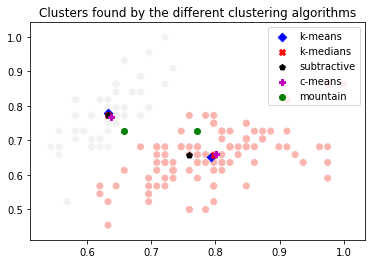

In [157]:
plt.scatter(i1[:, 0], i1[:, 1], c=U, cmap = 'Pastel1')
plt.scatter(clusters_k[:,0], clusters_k[:,1], c='b',marker = 'D', label = 'k-means')
plt.scatter(clusters[:,0], clusters[:,1], c='r',marker = 'X', label = 'k-medians')
plt.scatter(clusters_s[:,0], clusters_s[:,1], c='k', marker = 'p', label = 'subtractive')
plt.scatter(clusters_c[:,0], clusters_c[:,1], c='m', marker = 'P', label = 'c-means')
plt.scatter(clusters_m[:,0], clusters_m[:,1], c='g', label = 'mountain')
plt.title('Clusters found by the different clustering algorithms')
plt.legend()
plt.show()

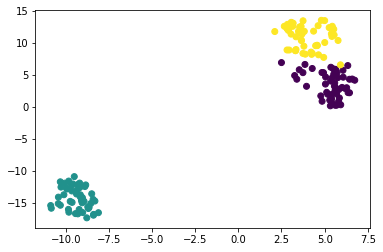

In [168]:
plt.scatter(Y[:,0], Y[:,1], c=U, cmap = 'viridis')
plt.show()

In [31]:
import gc
random_seed = 12
rng = np.random.RandomState(random_seed)  # random_seed
rng.randint(0,150,3)

array([ 75, 134, 130])

In [38]:
def kmeans(X,k,metric):
    #n_iter = 10000
    gc.enable()
    N, n = X.shape
    # Initialize the centers
    c_random = rng.randint(0,n,k)
    clusters = X[c_random]
    cluster_index = c_random
    # Ciclo principal
    Jdiff = np.inf
    Jprev = np.inf
    i = 0
    while (Jdiff > epsilon): #& (i < n_iter):
        # computar la matrix U
        U = compute_U(clusters, X, metric)
        # computar el costo
        J = cost_function(clusters, X, metric)
        # actualizar los clusters
        clusters = update_cluster(U, X, k)
        Jdiff = np.abs(J-Jprev)
        Jprev = J
        i += 1
    return clusters

In [67]:
kmeans(i1,2,'cityblock')

array([[0.79265823, 0.65272727, 0.71101449, 0.6704    ],
       [0.63367089, 0.77909091, 0.21188406, 0.0984    ]])

In [79]:
kmeans(i1,3,'cityblock')

<ipython-input-17-ecbd5faad018>:7: RuntimeWarning: Mean of empty slice
  new_cluster = np.nanmean(mask, axis=1)


array([[       nan,        nan,        nan,        nan],
       [       nan,        nan,        nan,        nan],
       [0.73966245, 0.69484848, 0.54463768, 0.47973333]])

In [92]:
kmeans(i1,5,'cityblock')

<ipython-input-17-ecbd5faad018>:7: RuntimeWarning: Mean of empty slice
  new_cluster = np.nanmean(mask, axis=1)


array([[       nan,        nan,        nan,        nan],
       [       nan,        nan,        nan,        nan],
       [       nan,        nan,        nan,        nan],
       [0.73966245, 0.69484848, 0.54463768, 0.47973333],
       [       nan,        nan,        nan,        nan]])